---

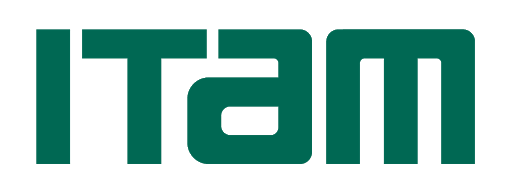

In [1]:
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('C:/Users/DANIEL/Documents/ITAM/Diplomado/04_Machine_Learning/logo_itam.png', width=700, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Diplomado en Data Science and Machine Learning Applied to Financial Markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

## Librerías

In [474]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd  
from scipy import stats
from scipy.stats import norm
%matplotlib inline

## Carga archivo

In [475]:
#Lectura de excel
dataset_acciones = pd.read_excel("ipc.xlsx", index_col='DATE')                                 

In [476]:
#Visualización de la tabla
dataset_acciones.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [477]:
#Tipo de datos por columna
dataset_acciones.dtypes

KIMBERA MF Equity     float64
GAPB MF Equity        float64
CEMEXCPO MF Equity    float64
ASURB MF Equity       float64
GFNORTEO MF Equity    float64
KOFUBL MF Equity      float64
AC* MF Equity         float64
LABB MF Equity        float64
FEMSAUBD MF Equity    float64
OMAB MF Equity        float64
GFINBURO MF Equity    float64
AMXL MF Equity        float64
ALSEA* MF Equity      float64
ORBIA* MF Equity      float64
PE&OLES* MF Equity    float64
GRUMAB MF Equity      float64
RA MF Equity          float64
WALMEX* MF Equity     float64
BOLSAA MF Equity      float64
LIVEPOLC MF Equity    float64
GENTERA* MF Equity    float64
IENOVA* MF Equity     float64
CUERVO* MF Equity     float64
ELEKTRA* MF Equity    float64
BBAJIOO MF Equity     float64
ALPEKA MF Equity      float64
MEGACPO MF Equity     float64
GCC* MF Equity        float64
BIMBOA MF Equity      float64
GMEXICOB MF Equity    float64
GCARSOA1 MF Equity    float64
TLEVICPO MF Equity    float64
ALFAA MF Equity       float64
BSMXB MF E

In [478]:
#Quita acciones con pocas observaciones
dataset_acciones = dataset_acciones.dropna(axis='columns')    

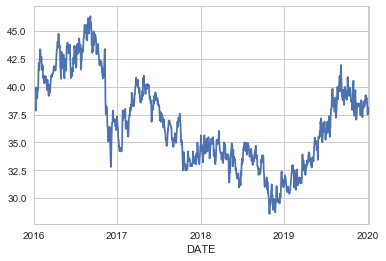

In [479]:
dataset_acciones['KIMBERA MF Equity'].plot();

## Selección de activos

In [480]:
import random

aList = []

for i in range(len(dataset_acciones.columns)-1):
    aList.append(dataset_acciones.columns[i])
    
    
print ("Selecciona 7 acciones aleatoriamente para el estudio")
sampled_list = random.sample(aList, 7)
print(sampled_list)

Selecciona 7 acciones aleatoriamente para el estudio
['BSMXB MF Equity', 'OMAB MF Equity', 'GFNORTEO MF Equity', 'ASURB MF Equity', 'MEGACPO MF Equity', 'WALMEX* MF Equity', 'CEMEXCPO MF Equity']


## Rendimientos

### Modelo de rendimiento promedio constante

In [481]:
def rend_constantes(arr_x):
    
    #Arreglo vacío de rendimientos
    rend = np.zeros(shape=[arr_x.shape[0],])

    #Cálculo de rendimientos
    for t in range(1, len(arr_x)):
        rend[t] = arr_x[t] / arr_x[t-1] - 1
    
    
    return rend, plt.plot(rend);

(array([ 0.        , -0.0261157 ,  0.00882553, ...,  0.        ,
         0.029036  , -0.00225734]),
 [<matplotlib.lines.Line2D at 0x1eb81a700c8>])

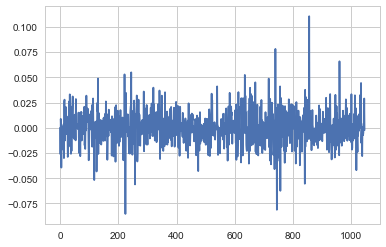

In [482]:
rend_constantes(np.array(dataset_acciones[sampled_list[0]]))

### Modelo CAPM

In [483]:
def calculo_beta(name_stock):
    
    #Cálculo de Rendimientos
    x_ , y_plot = rend_constantes(np.array(dataset_acciones[name_stock]))
    x2_ , y2_plot = rend_constantes(np.array(dataset_acciones['MEXBOL INDEX']))
    
    #Cálculo de regresi+on
    slope, intercept, r, p, std_err = stats.linregress(x2_,x_)
    
    
    print("Acción :", name_stock)
    
    print("La beta del activo es : ", slope)
    
    if slope > 1:
        print("La accción es de tipo :  AGRESIVA")
        tpo_Accion = 'aggressive'
    elif slope < 1:
        print("La accción es de tipo :  DEFENSIVA")
        tpo_Accion = 'defensive'
    else:
        print("Es la beta de mercado")
        tpo_Accion = 'market'
        
     
    
    return slope

#### Betas

Acción : BSMXB MF Equity
La beta del activo es :  1.0070845788081668
La accción es de tipo :  AGRESIVA


1.0070845788081668

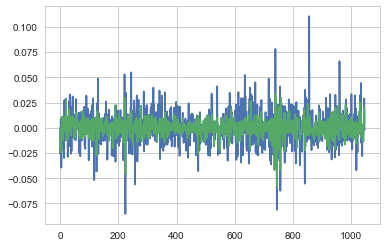

In [491]:
calculo_beta(name_stock=sampled_list[0])

Acción : OMAB MF Equity
La beta del activo es :  0.9251174632959644
La accción es de tipo :  DEFENSIVA


0.9251174632959644

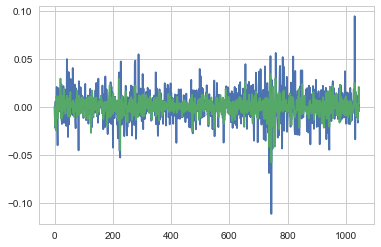

In [492]:
calculo_beta(name_stock=sampled_list[1])

Acción : GFNORTEO MF Equity
La beta del activo es :  1.5225087267580426
La accción es de tipo :  AGRESIVA


1.5225087267580426

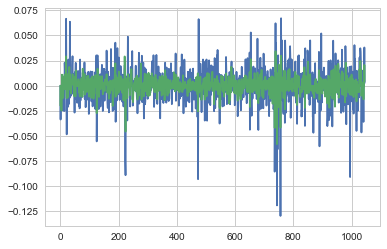

In [493]:
calculo_beta(name_stock=sampled_list[2])

Acción : ASURB MF Equity
La beta del activo es :  0.9161686600158987
La accción es de tipo :  DEFENSIVA


0.9161686600158987

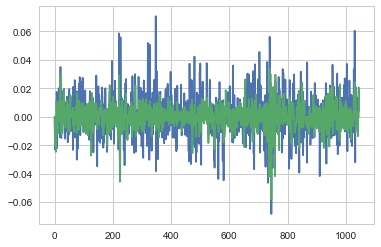

In [494]:
calculo_beta(name_stock=sampled_list[3])

Acción : MEGACPO MF Equity
La beta del activo es :  0.40676459708904694
La accción es de tipo :  DEFENSIVA


0.40676459708904694

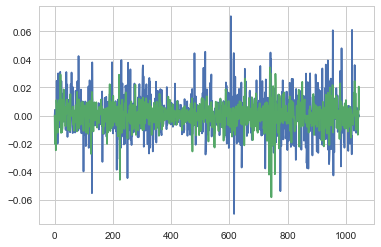

In [495]:
calculo_beta(name_stock=sampled_list[4])

Acción : WALMEX* MF Equity
La beta del activo es :  0.8854523254113305
La accción es de tipo :  DEFENSIVA


0.8854523254113305

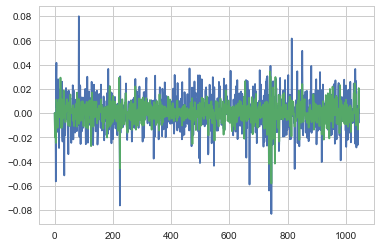

In [496]:
calculo_beta(name_stock=sampled_list[5])

Acción : CEMEXCPO MF Equity
La beta del activo es :  1.4573911845116665
La accción es de tipo :  AGRESIVA


1.4573911845116665

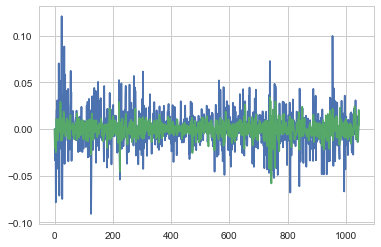

In [497]:
calculo_beta(name_stock=sampled_list[6])

In [498]:
print(sampled_list)

['BSMXB MF Equity', 'OMAB MF Equity', 'GFNORTEO MF Equity', 'ASURB MF Equity', 'MEGACPO MF Equity', 'WALMEX* MF Equity', 'CEMEXCPO MF Equity']


---

## Matriz de Varianzas-Covarianzas

MATRIZ de VAR-COV


,BSMXB MF Equity,OMAB MF Equity,GFNORTEO MF Equity,ASURB MF Equity,MEGACPO MF Equity,WALMEX* MF Equity,CEMEXCPO MF Equity
BSMXB MF Equity,0.000274,0.000076,0.000124,0.000066,0.000026,0.000051,0.000118
OMAB MF Equity,0.000076,0.000252,0.000096,0.000119,0.000036,0.000051,0.000073
GFNORTEO MF Equity,0.000124,0.000096,0.000341,0.000086,0.000041,0.000082,0.000130
ASURB MF Equity,0.000066,0.000119,0.000086,0.000224,0.000019,0.000036,0.000085
MEGACPO MF Equity,0.000026,0.000036,0.000041,0.000019,0.000190,0.000023,0.000045
WALMEX* MF Equity,0.000051,0.000051,0.000082,0.000036,0.000023,0.000215,0.000048
CEMEXCPO MF Equity,0.000118,0.000073,0.000130,0.000085,0.000045,0.000048,0.000410


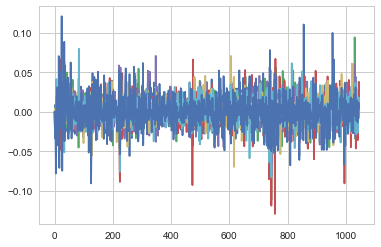

In [499]:

x_0 , y_plot0 = rend_constantes(np.array(dataset_acciones[sampled_list[0]]))
x_1 , y_plot1 = rend_constantes(np.array(dataset_acciones[sampled_list[1]]))
x_2 , y_plot2 = rend_constantes(np.array(dataset_acciones[sampled_list[2]]))
x_3 , y_plot3 = rend_constantes(np.array(dataset_acciones[sampled_list[3]]))
x_4 , y_plot4 = rend_constantes(np.array(dataset_acciones[sampled_list[4]]))
x_5 , y_plot5 = rend_constantes(np.array(dataset_acciones[sampled_list[5]]))
x_6 , y_plot6 = rend_constantes(np.array(dataset_acciones[sampled_list[6]]))

x = np.array([x_0, x_1, x_2, x_3, x_4, x_5, x_6]) 

Mat_var_cov_ = np.cov(x)

print("MATRIZ de VAR-COV") 
Mat_var_cov = pd.DataFrame(np.cov(x), 
                            index=sampled_list,
                            columns=sampled_list)
Mat_var_cov

---

## CAPM

### Rendimientos esperados 

$$ E[r_{i}] = r_{f} + \beta_{im}(E[r_{m}]-r_{f}) $$

Acción : BSMXB MF Equity
La beta del activo es :  1.0070845788081668
La accción es de tipo :  AGRESIVA
Acción : OMAB MF Equity
La beta del activo es :  0.9251174632959644
La accción es de tipo :  DEFENSIVA
Acción : GFNORTEO MF Equity
La beta del activo es :  1.5225087267580426
La accción es de tipo :  AGRESIVA
Acción : ASURB MF Equity
La beta del activo es :  0.9161686600158987
La accción es de tipo :  DEFENSIVA
Acción : MEGACPO MF Equity
La beta del activo es :  0.40676459708904694
La accción es de tipo :  DEFENSIVA
Acción : WALMEX* MF Equity
La beta del activo es :  0.8854523254113305
La accción es de tipo :  DEFENSIVA
Acción : CEMEXCPO MF Equity
La beta del activo es :  1.4573911845116665
La accción es de tipo :  AGRESIVA


array([0.15070846, 0.14251175, 0.20225087, 0.14161687, 0.09067646,
       0.13854523, 0.19573912])

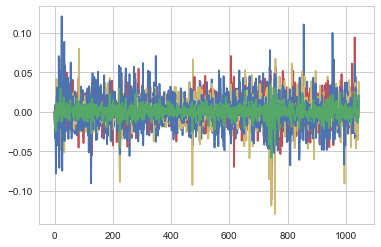

In [500]:
#Tasa libre de riesgo
r_f = 0.05

#Betas de Activos
beta_0 = calculo_beta(name_stock=sampled_list[0])
beta_1 = calculo_beta(name_stock=sampled_list[1])
beta_2 = calculo_beta(name_stock=sampled_list[2])
beta_3 = calculo_beta(name_stock=sampled_list[3])
beta_4 = calculo_beta(name_stock=sampled_list[4])
beta_5 = calculo_beta(name_stock=sampled_list[5])
beta_6 = calculo_beta(name_stock=sampled_list[6])

betas_port = np.array([beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6])

#Rendimiento esperado Activo 1
rend_esp = np.zeros_like(betas_port)



betas_port

#Premio por riesgo de mercado
# (𝐸[𝑟𝑚]−𝑟𝑓 = 10%)

for t in range(len(rend_esp)):
    rend_esp[t] = r_f + betas_port[t] * (0.10)
    
rend_esp



## Portafolios (Sin Ventas en Corto)

In [501]:
#Guarda rendimiento del portafolio
Rend_P = []
Var_P = []
Coef_Sharpe = []
Pesos_activos = []

#Simulación de Portafolios
No_activos_P = len(sampled_list)
No_Simulaciones = 100_000


#Corre Simulaciones
for k in range(No_Simulaciones):
    
    #Pesos por activo
    guarda_pesos = np.random.random(No_activos_P)
    guarda_pesos /= np.sum(guarda_pesos)
    
    #Rendimiento
    guarda_rendimientos = np.dot(guarda_pesos, rend_esp)
    
    #Varianza
    guarda_varianza = np.sqrt(np.dot(guarda_pesos.T, np.dot(Mat_var_cov_, guarda_pesos)))*252
    
    #Coef. de Sharpe
    guarda_sharpe = guarda_rendimientos / (guarda_varianza)
    
    #Guarda en listas 
    Coef_Sharpe.append(guarda_sharpe)
    Rend_P.append(guarda_rendimientos)
    Var_P.append(guarda_varianza)
    Pesos_activos.append(guarda_pesos)
    

# Transforma listas en dataFrame
dict_P = {'Rendimientos': Rend_P,
             'Varianza': Var_P,
             'Coef_Sharpe': Coef_Sharpe}


for i, k_nombre in enumerate(sampled_list):
    dict_P[k_nombre +' __W'] = [j[i] for j in Pesos_activos]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(dict_P)
df.head()

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
0,0.161628,2.827204,0.057169,0.080932,0.306697,0.294876,0.036775,0.093609,0.074083,0.113028
1,0.150028,2.588794,0.057953,0.158421,0.157271,0.122486,0.016793,0.246070,0.074172,0.224787
2,0.145111,2.590075,0.056026,0.045858,0.287686,0.045629,0.019662,0.254562,0.100325,0.246277
3,0.160246,2.685624,0.059668,0.161167,0.102515,0.194925,0.170130,0.094123,0.086583,0.190556
4,0.146689,2.702971,0.054270,0.039217,0.325631,0.065780,0.289991,0.117392,0.041116,0.120873


In [502]:
# Imprime portafolio de mínima varianza y portafolio que max Coef Sharpe
min_volatility = df['Varianza'].min()
max_sharpe = df['Coef_Sharpe'].max()

#Crea portafolios
Portafolio_riesgoso = df.loc[df['Coef_Sharpe'] == max_sharpe]
Portafolio_min_Var = df.loc[df['Varianza'] == min_volatility]


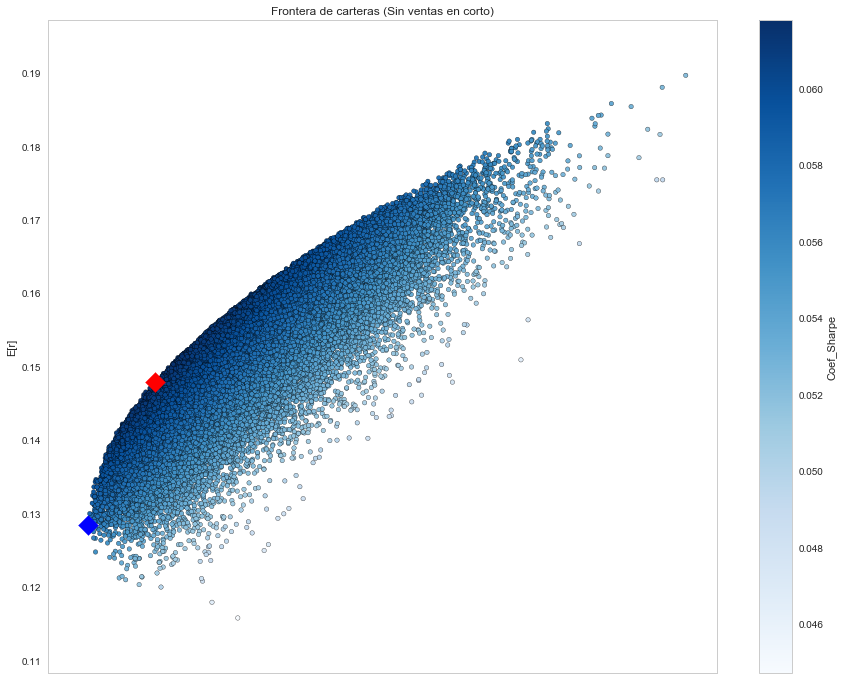

In [503]:
# Grafica todos los portafolios de las simulaciones
plt.style.use('seaborn-whitegrid')
df.plot.scatter(x='Varianza', y='Rendimientos', c='Coef_Sharpe',
                cmap='Blues', edgecolors='black', figsize=(15, 12), grid=False)
plt.scatter(x=Portafolio_riesgoso['Varianza'], y=Portafolio_riesgoso['Rendimientos'], c='red', marker='D', s=200)
plt.scatter(x=Portafolio_min_Var['Varianza'], y=Portafolio_min_Var['Rendimientos'], c='blue', marker='D', s=200 )
plt.xlabel('Sigma')
plt.ylabel('E[r]')
plt.title('Frontera de carteras (Sin ventas en corto)')
plt.show()

### Portafolio de mínima varianza

In [504]:
Portafolio_min_Var

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
23770,0.12845,2.238226,0.057389,0.11886,0.108182,0.019745,0.170954,0.317467,0.23955,0.025242


### Portafolio riesgoso óptimo

In [505]:
Portafolio_riesgoso

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
58171,0.147981,2.39524,0.061781,0.101209,0.080542,0.141773,0.18124,0.173128,0.206981,0.115127


## Portafolio (Con ventas en corto)

In [506]:
#Guarda rendimiento del portafolio
Rend_P = []
Var_P = []
Coef_Sharpe = []
Pesos_activos = []

#Simulación de Portafolios
No_activos_P = len(sampled_list)
No_Simulaciones = 1_000_000


#Pesos con venta en corto
arr_pesos = np.zeros(shape=[No_Simulaciones,No_activos_P])
for t in range(len(arr_pesos)):
    for i in range(No_activos_P):
        arr_pesos[t][i] = random.randrange(start = -10000, stop = 10000)/10000
        
for i in range(len(arr_pesos)):
    arr_pesos[i][6] = 1 - (arr_pesos[i][0:6].sum())

    
#Corre Simulaciones
for k in range(No_Simulaciones):
    
    #Pesos por activo
    guarda_pesos = arr_pesos[k]
    
    #Rendimiento
    guarda_rendimientos = np.dot(guarda_pesos, rend_esp)
    
    #Varianza
    guarda_varianza = np.sqrt(np.dot(guarda_pesos.T, np.dot(Mat_var_cov_, guarda_pesos)))*252
    
    #Coef. de Sharpe
    guarda_sharpe = guarda_rendimientos / (guarda_varianza)
    
    #Guarda en listas 
    Coef_Sharpe.append(guarda_sharpe)
    Rend_P.append(guarda_rendimientos)
    Var_P.append(guarda_varianza)
    Pesos_activos.append(guarda_pesos)
    

# Transforma listas en dataFrame
dict_P = {'Rendimientos': Rend_P,
             'Varianza': Var_P,
             'Coef_Sharpe': Coef_Sharpe}


for i, k_nombre in enumerate(sampled_list):
    dict_P[k_nombre +' __W'] = [j[i] for j in Pesos_activos]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(dict_P)
df.head()

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
0,0.225685,10.171643,0.022188,-0.7817,0.4041,0.0109,-0.8997,0.4519,-0.2617,2.0762
1,0.292997,10.274727,0.028516,0.8956,-0.6354,0.2330,-0.7198,-0.9149,0.5740,1.5675
2,0.174277,5.921464,0.029431,0.6408,0.3641,0.2041,-0.8774,0.4637,-0.4664,0.6711
3,0.040296,5.968525,0.006751,0.8677,-0.1278,-0.6326,-0.4898,0.9374,0.8231,-0.3780
4,0.210342,9.784942,0.021497,-0.2813,-0.4451,-0.7340,-0.2343,-0.2541,0.9853,1.9635


In [507]:
# Imprime portafolio de mínima varianza y portafolio que max Coef Sharpe
min_volatility = df['Varianza'].min()
max_sharpe = df['Coef_Sharpe'].max()

#Crea portafolios
Portafolio_riesgoso = df.loc[df['Coef_Sharpe'] == max_sharpe]
Portafolio_min_Var = df.loc[df['Varianza'] == min_volatility]

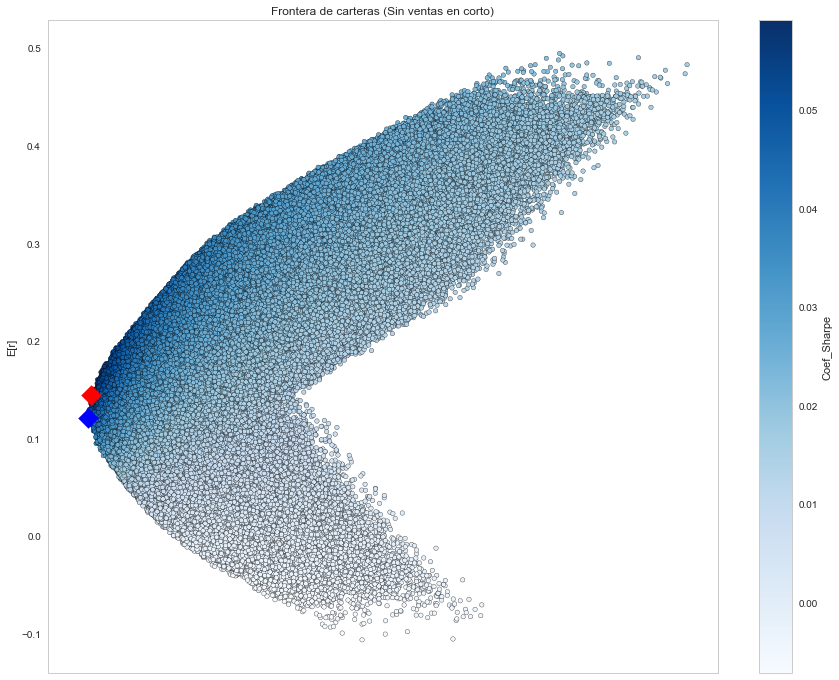

In [508]:
# Grafica todos los portafolios de las simulaciones
plt.style.use('seaborn-whitegrid')
df.plot.scatter(x='Varianza', y='Rendimientos', c='Coef_Sharpe',
                cmap='Blues', edgecolors='black', figsize=(15, 12), grid=False)
plt.scatter(x=Portafolio_riesgoso['Varianza'], y=Portafolio_riesgoso['Rendimientos'], c='red', marker='D', s=200)
plt.scatter(x=Portafolio_min_Var['Varianza'], y=Portafolio_min_Var['Rendimientos'], c='blue', marker='D', s=200 )
plt.xlabel('Sigma')
plt.ylabel('E[r]')
plt.title('Frontera de carteras (Sin ventas en corto)')
plt.show()

### Portafolio de mínima varianza

In [509]:
Portafolio_min_Var

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
84761,0.120445,2.306638,0.052217,0.1186,-0.0316,-0.0547,0.2949,0.3495,0.3252,-0.0019


### Portafolio riesgoso óptimo

In [510]:
Portafolio_riesgoso

,Rendimientos,Varianza,Coef_Sharpe,BSMXB MF Equity __W,OMAB MF Equity __W,GFNORTEO MF Equity __W,ASURB MF Equity __W,MEGACPO MF Equity __W,WALMEX* MF Equity __W,CEMEXCPO MF Equity __W
21190,0.144529,2.447584,0.05905,0.0887,0.03,0.1111,0.0586,0.2029,0.3821,0.1266


## VaR paramétrico (Portafolio Riesgoso)

In [511]:
#Suponemos una inversión de $1,000,000.0

Monto_invertido = 1_000_000
Niv_conf = 0.95

F = norm.ppf(Niv_conf)

Desv_est_Anual = np.sqrt(Portafolio_riesgoso['Varianza']/100)
Desv_est_diaria = np.sqrt(Portafolio_riesgoso['Varianza']/(100*252))

vaR_P_anual = Monto_invertido * F * Desv_est_Anual
vaR_P_diaria = Monto_invertido * F * Desv_est_diaria

pesos_activo = np.array(Portafolio_riesgoso)[0][-7:]
Vector_pos = pesos_activo * Monto_invertido

Var_anual_Act = Mat_var_cov_.diagonal() * 252
Var_diaria_Act = Mat_var_cov_.diagonal()

vaR_activos_diaria = Vector_pos * F * Var_diaria_Act
vaR_activos_anual = Vector_pos * F * Var_anual_Act


Ef_div_anual = abs(vaR_P_anual - vaR_activos_anual.sum())
Ef_div_diario = abs(vaR_P_diaria - vaR_activos_diaria.sum())


print("VaR paramétrico (Anual) :", '${:,.2f}'.format(vaR_P_anual.to_numpy()[0]))
print("VaR paramétrico (Diaria) :", '${:,.2f}'.format(vaR_P_diaria.to_numpy()[0]))
print('---'*10)
print('\n'*2)


print("Efecto de diversificación (Anual) :", '${:,.2f}'.format(Ef_div_anual.to_numpy()[0]))
print("Efecto de diversificación (Diario) :", '${:,.2f}'.format(Ef_div_diario.to_numpy()[0]))



VaR paramétrico (Anual) : $257,333.33
VaR paramétrico (Diaria) : $16,210.48
------------------------------



Efecto de diversificación (Anual) : $151,409.39
Efecto de diversificación (Diario) : $15,790.14


## BONUS POINT: cálculo de la "y"

$$ y = \frac{E[r_{p}]-r_{f}}{A\sigma^2}$$

In [512]:
#Constantes
r_f = 0.05
A = 3


R_p = Portafolio_riesgoso['Rendimientos'].to_numpy()[0]
s_p = np.sqrt(Portafolio_riesgoso['Varianza'].to_numpy()[0]/100)


print("Tasa libre de riesgo : ", "{:.2%}".format(r_f))
print("Nivel de aversión al rgo A: ", A)
print("Rendimiento del Portafolios : ", "{:.2%}".format(R_p))
print("Volatilidad del Portafolios : ", "{:.2%}".format(s_p))
print('---'*10)
print('\n'*2)



y = ( R_p - r_f) / (A * (s_p**2))

print("% de inversión en Portafolios de Rgo : ", "{:.2%}".format(y))

Tasa libre de riesgo :  5.00%
Nivel de aversión al rgo A:  3
Rendimiento del Portafolios :  14.45%
Volatilidad del Portafolios :  15.64%
------------------------------



% de inversión en Portafolios de Rgo :  128.74%


---